## 사전준비- 필요한 라이브러리 Import

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

- 크롬 브라우저 버전 확인 법 > 크롬 > 설정 : 현재 105

In [14]:
chrome_optios = webdriver.ChromeOptions()
# driver = webdriver.Chrome(service=Service(ChromeDriverManager(os_type="mac_arm64").install()))
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_option)
driver = webdriver.Chrome(executable_path='/Users/himhimm/Study/crawling/chromedriver')

/var/folders/8p/jtp835r93yb9kz51k9s_33_00000gn/T/ipykernel_7664/2556985017.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/Users/himhimm/Study/crawling/chromedriver')


- 에러발생 : ValueError: There is no such driver by url https://chromedriver.storage.googleapis.com/106.0.5249.61/chromedriver_mac64_m1.zip


=> mac의 google chrome url이 변경 된 것 같아보임...



### 1) 섹션 나누기

In [15]:
# 넷플릭스 사이트 주소 넣어주기
url = 'https://www.netflix.com/kr/browse/genre/839338'
driver.get(url)

In [16]:
html = driver.page_source # 브라우저가 가지고 있는 정보를 가져옴
soup = BeautifulSoup(html, 'html.parser')
# html.parser 기준으로 html에 담아있는 정보를 읽어줘!

In [ ]:
# soup.select() : 조건에 해당하는 모든 태그를 찾아줘 => 결과는 list 형태

`alt + cmd + i` : 맥에서 웹 개발자 모드 단축어

In [18]:
# 섹션 찾기
# 어디에서 찾을 꺼야? -> 변수
section_list = soup.select('section')
len(section_list)

24

In [19]:
## 내가 실제로 찾을려고 하는 태그 묶음의 정답을 알경우
# -> 원하는 정보 찾을 때까지 조절

## 내가 정답을 모를 경우 -> 처음, 마지막, 중간 샘플로 살펴봄

In [42]:
# 전부 다 태그로 나옴
section_list[2]

<section class="nm-collections-row" data-uia="collections-row"><h2 class="nm-collections-row-name" data-uia="collections-row-title"><a class="nm-collections-link" href="https://www.netflix.com/kr/browse/genre/1365"><span class="nm-collections-row-name">넷플릭스 인기 콘텐츠</span><span class="nm-collections-row-link">더 살펴보기</span></a></h2><div aria-hidden="false" class="nm-content-horizontal-row"><ul class="nm-content-horizontal-row-item-container"><li class="nm-content-horizontal-row-item" data-uia="collections-row-item"><a class="nm-collections-title nm-collections-link" data-uia="collections-title" href="https://www.netflix.com/kr/title/81343748"><img alt="" class="nm-collections-title-img" data-title-id="81343748" src="https://occ-0-2794-988.1.nflxso.net/dnm/api/v6/6gmvu2hxdfnQ55LZZjyzYR4kzGk/AAAABasQef2myp1rKUQx49uRXxukTa3Z5-muOpZB9lBT09nl-gbQ2ZWPPqjlmp3Q3dQ500OYmbrulV42blDqeB_lxPfZsN0ikIJC6slu9qMeuxh452VEd5ckKuEcTBA7wrJeBrf3.jpg?r=50c"/><span class="nm-collections-title-img placeholder"></

In [43]:
# tag.text -> 화면에 보이는 글만 보여줌

section_list[2].text

'넷플릭스 인기 콘텐츠더 살펴보기수리남매니페스트다머로스트 인 스페이스소년심판슈퍼키드 디온루시퍼기묘한 이야기오징어 게임지금 우리 학교는위쳐너의 모든 것꼴찌 마녀 밀드레드절대쌍교마이 네임모범가족피키 블라인더스지정생존자씨 비스트브리저튼서울대작전쿵푸팬더: 용의 기사에밀리, 파리에 가다라바 아일랜드종이의 집빨간 머리 앤보스 베이비: 돌아온 보스하이 워터베이비시터 클럽더 크라운오티스의 비밀 상담소지옥아웃랜더나르코스블랙의 신부스위트홈컵헤드 쇼!굿 플레이스보스 베이비: 다시 베이비로바다 탐험대 옥토넛: 육지 수호 대작전'

In [44]:
section_list[17].text

'스릴러 영화사냥감2위험한 거짓말들내가 그 소녀들이다위크엔드 어웨이뮌헨: 전쟁의 문턱에서우먼 인 윈도1922레드 씨 다이빙 리조트버드 박스스파이더헤드언컷 젬스킬러 와이프아미 오브 더 데드: 도둑들마지막 게임ARQ피파사냥의 시간콜지옥에서 온 전언시크릿 옵세션어웨이크솔로: 벼랑 끝에서 홀로추즈 오어 다이코드명 엔젤O2콜디스트 게임당신의 아들아웃사이더침입자나의 마더타우가질 수 있다면걸 온 더 트레인잠든 여인페리마더/안드로이드오퍼레이션 피날레블랙 아일랜드위험한 만남'

section_list에서 17까지의 정보만 필요하므로 그에 따라 작업을 진행해줌

-> 17까지의 값만 필요로 하기에 슬라이싱 해줌

In [45]:
section_list = section_list[2:18]

In [46]:
section_list[-1].text

'스릴러 영화사냥감2위험한 거짓말들내가 그 소녀들이다위크엔드 어웨이뮌헨: 전쟁의 문턱에서우먼 인 윈도1922레드 씨 다이빙 리조트버드 박스스파이더헤드언컷 젬스킬러 와이프아미 오브 더 데드: 도둑들마지막 게임ARQ피파사냥의 시간콜지옥에서 온 전언시크릿 옵세션어웨이크솔로: 벼랑 끝에서 홀로추즈 오어 다이코드명 엔젤O2콜디스트 게임당신의 아들아웃사이더침입자나의 마더타우가질 수 있다면걸 온 더 트레인잠든 여인페리마더/안드로이드오퍼레이션 피날레블랙 아일랜드위험한 만남'

### 2) 프로그램 모음 - 네이밍- 찾기 

In [47]:
# 하나의 섹션 지정하기
section = section_list[0]
section

<section class="nm-collections-row" data-uia="collections-row"><h2 class="nm-collections-row-name" data-uia="collections-row-title"><a class="nm-collections-link" href="https://www.netflix.com/kr/browse/genre/1365"><span class="nm-collections-row-name">넷플릭스 인기 콘텐츠</span><span class="nm-collections-row-link">더 살펴보기</span></a></h2><div aria-hidden="false" class="nm-content-horizontal-row"><ul class="nm-content-horizontal-row-item-container"><li class="nm-content-horizontal-row-item" data-uia="collections-row-item"><a class="nm-collections-title nm-collections-link" data-uia="collections-title" href="https://www.netflix.com/kr/title/81343748"><img alt="" class="nm-collections-title-img" data-title-id="81343748" src="https://occ-0-2794-988.1.nflxso.net/dnm/api/v6/6gmvu2hxdfnQ55LZZjyzYR4kzGk/AAAABasQef2myp1rKUQx49uRXxukTa3Z5-muOpZB9lBT09nl-gbQ2ZWPPqjlmp3Q3dQ500OYmbrulV42blDqeB_lxPfZsN0ikIJC6slu9qMeuxh452VEd5ckKuEcTBA7wrJeBrf3.jpg?r=50c"/><span class="nm-collections-title-img placeholder"></

In [49]:
# 섹션 내에서 필요한 정보를 찾을 것임
section_title = section.select('h2')
# len(section_title) 1개있음
section_title

[<h2 class="nm-collections-row-name" data-uia="collections-row-title"><a class="nm-collections-link" href="https://www.netflix.com/kr/browse/genre/1365"><span class="nm-collections-row-name">넷플릭스 인기 콘텐츠</span><span class="nm-collections-row-link">더 살펴보기</span></a></h2>]

In [50]:
section_title[0].text

'넷플릭스 인기 콘텐츠더 살펴보기'

In [52]:
# section_list 17 --> 첫번째 만 지정해서 찾음

section = section_list[0]
section_title = section.select('h2')[0].text
section_title

'넷플릭스 인기 콘텐츠더 살펴보기'

In [53]:
section = section_list[1]
section_title = section.select('h2')[0].text
section_title

'새로 올라온 콘텐츠'

In [109]:
section = section_list[2]
section_title = section.select('h2')[0].text
section_title

'넷플릭스 인기 콘텐츠더 살펴보기'

In [55]:
for section in section_list:
    section == section_list[0]
    section_title = section.select('h2')[0].text
    print(section_title)

넷플릭스 인기 콘텐츠더 살펴보기
새로 올라온 콘텐츠
액션 & 어드벤처더 살펴보기
주말엔 몰아보기!더 살펴보기
몰아보기 추천 시리즈더 살펴보기
한국 드라마 & 버라이어티
애니더 살펴보기
평단의 찬사를 받은 시리즈더 살펴보기
청소년 시리즈더 살펴보기
아시아 영화 & 시리즈더 살펴보기
드라마 장르더 살펴보기
범죄 시리즈
한국 드라마
엉뚱 & 허당 캐릭터 집합!더 살펴보기
액션 영화
스릴러 영화


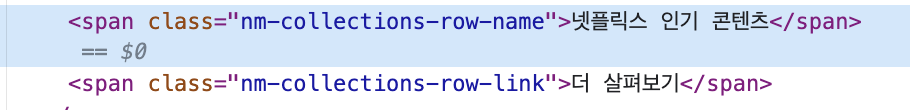

더 살펴보기가 있는 것이 있고, 없는 것이 있는 것 같음

In [63]:
# section_title= '넷플릭스 인기 콘텐츠더 살펴보기'
section_title = '신규 콘텐츠'
section_title.replace('더 살펴보기','')

'신규 콘텐츠'

In [65]:
# 섹션 제목 정리하기
for section in section_list:
    section_title = section.select('h2')[0].text.replace('더 살펴보기', '')
    print(section_title)

넷플릭스 인기 콘텐츠
새로 올라온 콘텐츠
액션 & 어드벤처
주말엔 몰아보기!
몰아보기 추천 시리즈
한국 드라마 & 버라이어티
애니
평단의 찬사를 받은 시리즈
청소년 시리즈
아시아 영화 & 시리즈
드라마 장르
범죄 시리즈
한국 드라마
엉뚱 & 허당 캐릭터 집합!
액션 영화
스릴러 영화


### 4) 프로그램 파트 중 프로그램 찾기

In [70]:
# 섹션 나누기
section_list = soup.select("section")

# 하나의 섹션 지정하기
section = section_list[2]

# 섹션 제목 찾기
section_title = section.select("h2")[0].text.replace('더 살펴보기', '')
section_title

'넷플릭스 인기 콘텐츠'

In [71]:
# 프로그램 파트
program_list = section.select('li')
len(program_list)

40